In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Pea Flowers

In [2]:
possible_colors = make_array('Purple', 'Purple', 'Purple', 'White')
total_plants = 929

def get_sample():
    return np.random.choice(possible_colors, total_plants)

def test_statistic(sample):
    proportion_purple = np.count_nonzero(sample == 'Purple') / len(sample)
    return proportion_purple

In [3]:
# Simulating the statistic
repetitions = 5000
predicted_stats = make_array()

for i in np.arange(repetitions):
    new_sample = get_sample()
    predicted_stats = np.append(predicted_stats, test_statistic(new_sample))

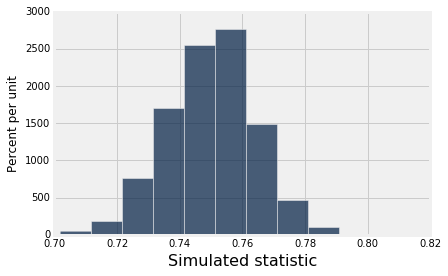

In [4]:
pred = Table().with_column('Simulated statistic', predicted_stats)
pred.hist()

## Comparing to observed data

In [5]:
observed_purples = 705
observed_proportion_purple = observed_purples / total_plants
observed_statistic = observed_proportion_purple
observed_statistic

0.7588805166846071

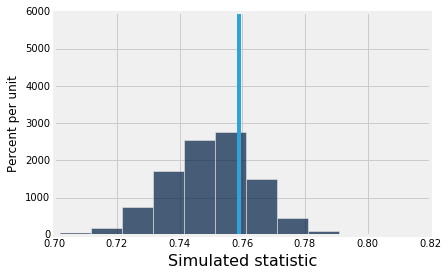

In [6]:

pred.hist()
_ = plots.plot([observed_statistic, observed_statistic], [0, 60])

## A different statistic

In [7]:
def test_statistic2(sample):
    proportion_purple = np.count_nonzero(sample == 'Purple') / len(sample)
    return abs(proportion_purple - 0.75)

In [8]:
# Simulating the test statistic
repetitions = 5000
predicted_stats = make_array()

for i in np.arange(repetitions):
    new_sample = get_sample()
    predicted_stats = np.append(predicted_stats, test_statistic2(new_sample))

In [9]:
observed_statistic = abs(observed_proportion_purple - 0.75)
observed_statistic

0.008880516684607098

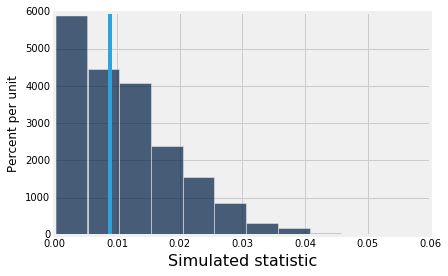

In [10]:
pred = Table().with_column('Simulated statistic', predicted_stats)
pred.hist()
observed_statistic = abs(observed_proportion_purple - 0.75)
_ = plots.plot([observed_statistic, observed_statistic], [0, 60])

## Yet another statistic

In [ ]:
def number_of_different_colors(sample):
    return Table().with_column('values', sample).group(0).num_rows

observed_num_colors = 2

In [ ]:
# Simulating the statistic
repetitions = 5000
sampled_stats = make_array()

for i in np.arange(repetitions):
    new_sample = get_sample()
    sampled_stats = np.append(sampled_stats, number_of_different_colors(new_sample))

In [ ]:
Table().with_column('Simulated statistic', sampled_stats).hist()

## Swain v. Alabama

In [ ]:
swain = Table().with_columns(
    'Ethnicity', make_array('Black', 'Other'),
    'Eligible', make_array(0.26, 0.74),
    'Panel', make_array(0.08, 0.92)
)

swain.set_format([1, 2], PercentFormatter(0))

In [ ]:
swain.barh(0)

## Simulating

In [ ]:
swain.sample(10)

In [ ]:
ethnicity = swain.select('Ethnicity')
ethnicity

In [ ]:
ethnicity.sample(10)

In [ ]:
population_distribution = swain.column('Eligible')
population_distribution

In [ ]:
ethnicity.sample(10, weights=population_distribution)

In [ ]:
panel_size = 100
swain.select('Ethnicity').sample(panel_size, weights=swain.column('Eligible'))

In [ ]:
panel = swain.select('Ethnicity').sample(panel_size, weights=swain.column('Eligible'))
counts = panel.group('Ethnicity')
sample_proportions = counts.select('Ethnicity').with_column('Random', counts.column('count') / panel_size)
sample_proportions.set_format('Random', PercentFormatter(0))

In [ ]:
swain.join('Ethnicity', sample_proportions)

In [ ]:
def random_jury_panel():
    panel = swain.select('Ethnicity').sample(panel_size, weights=swain.column('Eligible'))
    counts = panel.group('Ethnicity')
    sample_proportions = counts.select('Ethnicity').with_column('Random', counts.column('count') / panel_size)
    sample_proportions.set_format('Random', PercentFormatter(0))
    return swain.join('Ethnicity', sample_proportions)

random_jury_panel()

In [ ]:
# Compute the empirical distribution of predicted proportions

predicted_proportions = make_array()

for i in np.arange(1000): # Repetitions
    new_sample = random_jury_panel()
    prop = new_sample.where('Ethnicity', 'Black').column('Random').item(0)
    predicted_proportions = np.append(predicted_proportions, prop)

results = Table().with_column('Predicted proportions', predicted_proportions)
results

In [ ]:
results.hist()